In [4]:
###########################################################
#
#
# met927's response incorporated into the github example
#
#
###########################################################


from qiskit.aqua import run_algorithm
from qiskit.aqua.input import LinearSystemInput
from qiskit.aqua.algorithms.single_sample import HHL

import numpy as np

# System to solve
# A  = [[1.5, 0.5], [0.5, 1.5]]
# b =  [2, 2]

matrix = [[1.5, 0.5], [0.5, 1.5]]
vector = [2, 2]

params = {
    'problem': {
        'name': 'linear_system'
    },
    'algorithm': {
        'name': 'HHL'
    },
    'eigs': {
        'expansion_mode': 'suzuki',
        'expansion_order': 2,
        'name': 'EigsQPE',
        'num_ancillae': 3,
        'num_time_slices': 50
    },
    'reciprocal': {
        'name': 'Lookup'
    },
    'backend': {
        'provider': 'qiskit.BasicAer',
        'name': 'statevector_simulator'
    }
}

params['input'] = {
    'name': 'LinearSystemInput',
    'matrix': matrix,
    'vector': vector
}

params['algorithm'] = {
    'truncate_powerdim': False,
    'truncate_hermitian': False
}
params['reciprocal'] = {
    'name': 'Lookup',
    'negative_evals': True
}
params['eigs'] = {
    'expansion_mode': 'suzuki',
    'expansion_order': 2,
    'name': 'EigsQPE',
    'negative_evals': False,
    'num_ancillae': 1,
    'num_time_slices': 70
}
params['initial_state'] = {
    'name': 'CUSTOM'
}
params['iqft'] = {
    'name': 'STANDARD'
}
params['qft'] = {
    'name': 'STANDARD'
}


# Prep the input
algo_input = LinearSystemInput(matrix=matrix, vector=vector)

# Run the HHL algorithm
hhl = HHL.init_params(params, algo_input)

# Draw the circuit
print(hhl.construct_circuit())

ModuleNotFoundError: No module named 'qiskit.aqua'

In [100]:
0.9010**2 + 0.4339**2

1.00007021

In [4]:
# First, you import several modules and classes from Qiskit, as well as NumPy and SciPy:

import numpy as np
from qiskit.algorithms.linear_solvers.numpy_linear_solver import NumPyLinearSolver
from qiskit.algorithms.linear_solvers.hhl import HHL
from qiskit.algorithms.linear_solvers.matrices.tridiagonal_toeplitz import TridiagonalToeplitz
from qiskit.quantum_info import Statevector
from scipy.sparse import diags
from qiskit import transpile, QuantumCircuit
from qiskit.algorithms.linear_solvers.observables import AbsoluteAverage, MatrixFunctional
from qiskit import Aer

# Next, you define a matrix and a vector for solving a system of linear equations using the HHL algorithm:
# Define matrix and vector for solving the system of linear equations using HHL algorithm
matrix = np.array([[1, -1/3], [-1/3, 1]])
vector = np.array([1, 0])

# You then use the HHL class to solve the system of equations using the matrix and vector, and print the resulting state:
# Solve the system of equations using HHL and print the resulting state
naive_hhl_solution = HHL().solve(matrix, vector)
print('naive state:')
print(naive_hhl_solution.state)

# Next, you define a tridiagonal Toeplitz matrix and solve the same system of equations using the HHL algorithm:
# Define a tridiagonal Toeplitz matrix and solve the system of equations using HHL
tridi_matrix = TridiagonalToeplitz(1, 1, -1 / 3)
tridi_solution = HHL().solve(tridi_matrix, vector)

# Print the resulting state
print('tridiagonal state:')
print(tridi_solution.state)

# You then extract the full solution vectors and print them, along with their Euclidean norms:
# Extract the full solution vectors and print them, along with their Euclidean norms
naive_sv = Statevector(naive_hhl_solution.state).data
tridi_sv = Statevector(tridi_solution.state).data
naive_full_vector = np.array([naive_sv[8], naive_sv[9]])
tridi_full_vector = np.array([tridi_sv[8], tridi_sv[9]])
print('naive raw solution vector:', naive_full_vector)
print('tridi raw solution vector:', tridi_full_vector)
print('naive Euclidean norm:', naive_hhl_solution.euclidean_norm)
print('tridiagonal Euclidean norm:', tridi_solution.euclidean_norm)
print('full naive solution vector:', naive_hhl_solution.euclidean_norm*naive_full_vector/np.linalg.norm(naive_full_vector))
print('full tridi solution vector:', tridi_solution.euclidean_norm*tridi_full_vector/np.linalg.norm(tridi_full_vector))

#You then construct the quantum circuit for solving the same system of equations
#using the HHL algorithm, and draw the circuit at different levels of decomposition:

# Construct the quantum circuit for solving the system of linear equations using HHL,
#and draw the circuit at different levels of decomposition

hhl = HHL()
circuit = hhl.construct_circuit(matrix, vector)
circuit.draw('mpl')
circuit.decompose().draw('mpl')
circuit.decompose().decompose().draw('mpl')
circuit.decompose().decompose().decompose().draw('mpl')
circuit.decompose().decompose().decompose().decompose().draw('mpl')
circuit.decompose().decompose().decompose().decompose().decompose().draw('mpl')

ModuleNotFoundError: No module named 'qiskit.algorithms'

In [77]:
def qft_dagger(qc, n):
    """n-qubit QFTdagger the first n qubits in circ"""
    # Don't forget the Swaps!
    for qubit in range(n//2): #n//2
        qc.swap(qubit+1, n-qubit)
    for j in range(n): #n
        # print(f"j{j}")
        for m in range(j):
            # print(f"m{m}")
            qc.cp(np.pi/float(2**(j-m)), m+1, j+1)
        qc.h(j+1)

In [78]:
def qft(qc, n):
    """n-qubit QFTdagger the first n qubits in circ"""
    # Don't forget the Swaps!
    for j in range(n): #n
        # print(f"j{j}")
        for m in range(j):
            # print(f"m{m}")
            qc.cp(-np.pi/float(2**(j-m)), clock[m], clock[j])
        qc.h(clock[n-j-1])
    for qubit in range(n//2): #n//2
        qc.swap(clock[qubit], clock[n-qubit-1])

In [72]:
def simulate(qpe):
    aer_sim = Aer.get_backend('aer_simulator')
    shots = 2048
    t_qpe = transpile(qpe, aer_sim)
    qobj = assemble(t_qpe, shots=shots)
    results = aer_sim.run(qobj).result()
    answer = results.get_counts()
    for k, v in answer.items():
      answer[k] = answer[k] / shots
    return answer

C:\Users\lisis\AppData\Local\Temp\ipykernel_17000\3278665204.py:6: DeprecationWarning: Using a qobj for run() is deprecated as of qiskit-aer 0.9.0 and will be removed no sooner than 3 months from that release date. Transpiled circuits should now be passed directly using `backend.run(circuits, **run_options).
  results = aer_sim.run(qobj).result()
C:\Users\lisis\AppData\Local\Temp\ipykernel_17000\690342242.py:68: DeprecationWarning: Using plot_histogram() ``data`` argument with QuasiDistribution, ProbDistribution, or a distribution dictionary is deprecated as of qiskit-terra 0.22.0. It will be removed no earlier than 3 months after the release date. Instead, use ``plot_distribution()``.
  plot_histogram(measurements)


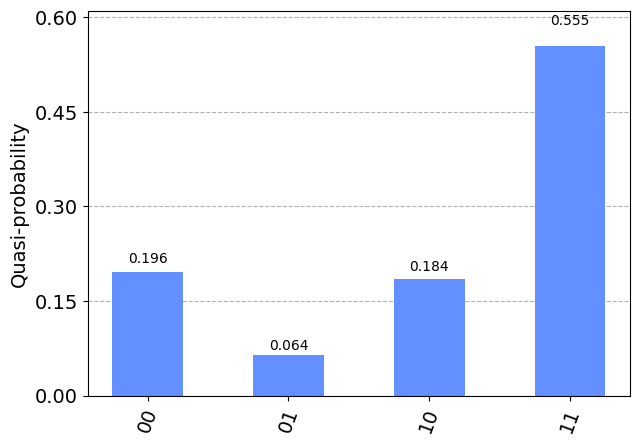

In [136]:
from qiskit.circuit import QuantumCircuit, QuantumRegister, ClassicalRegister, Parameter
from qiskit.circuit.library import UnitaryGate, CRYGate
from qiskit import Aer, transpile, assemble, execute
from qiskit.visualization import plot_histogram
from qiskit_aer import QasmSimulator 
import numpy as np
import scipy.linalg as la

import collections

state = np.array([0, 1])
# state = la.expm(-1j*state)
H = np.array([[1, -1/3], [-1/3, 1]])
# U = la.expm(-1j*H)
# print(U)
U = np.array([[-1+1j, 1+1j], [1+1j, -1+1j]]) / 2
# print(U)

U_gate = UnitaryGate(U, 'U').control(1)

ancilla = QuantumRegister(1, 'ancilla')
clock = QuantumRegister(2, 'clock')
b = QuantumRegister(1, 'b')
classical = ClassicalRegister(2, 'classical')
circuit = QuantumCircuit(ancilla, clock, b, classical)
for q_idx in range(len(clock)):
    circuit.h(clock[q_idx])

circuit.prepare_state(state, b)


for q_idx in range(len(clock)):
    for _ in range(2**q_idx):
        circuit.append(U_gate, [q_idx + 1, b])
circuit.barrier()

qft(circuit, 2)

circuit.cry(np.pi, clock[0], ancilla)
circuit.cry(np.pi/3, clock[1], ancilla)

circuit.measure(ancilla, classical[0])

qft_dagger(circuit, 2)
circuit.barrier()

U = np.linalg.inv(U)
U_gate = UnitaryGate(U, 'U-1').control(1)
for q_idx in range(len(clock)):
    for _ in range(2**(len(clock) - q_idx - 1)):
        circuit.append(U_gate, [len(clock) - q_idx, b])
circuit.barrier()

for q_idx in range(len(clock)):
    circuit.h(clock[q_idx])
circuit.barrier()

# simulator = Aer.get_backend("aer_simulator")
# transpiled = transpile(circuit, simulator)
# transpiled.save_statevector()
# result = simulator.run(transpiled).result()
# print(result.get_statevector())

circuit.measure(b, classical[1])
measurements = simulate(circuit)
# print(collections.OrderedDict(sorted(measurements.items())))

plot_histogram(measurements)

In [137]:
circuit.draw()

░                     »
    ancilla: ──────────────────────────────────────────░─────────────────────»
                       ┌───┐                           ░                ┌───┐»
    clock_0: ──────────┤ H ├─────────────■─────────────░───────■────────┤ H ├»
                       ├───┤             │             ░ ┌───┐ │P(-π/2) └───┘»
    clock_1: ──────────┤ H ├─────────────┼────■────■───░─┤ H ├─■─────────────»
             ┌─────────┴───┴──────────┐┌─┴─┐┌─┴─┐┌─┴─┐ ░ └───┘               »
          b: ┤ State Preparation(0,1) ├┤ U ├┤ U ├┤ U ├─░─────────────────────»
             └────────────────────────┘└───┘└───┘└───┘ ░                     »
classical: 2/════════════════════════════════════════════════════════════════»
                                                                             »
«                ┌───────┐┌─────────┐┌─┐                       ░               »
«    ancilla: ───┤ Ry(π) ├┤ Ry(π/3) ├┤M├───────────────────────░───────────────»
«                └───┬───┘└────┬────┘└╥┘   ┌───┐               ░               »
«    clock_0: ─X─────■─────────┼──────╫──X─┤ H ├─■─────────────░───────────────»
«              │               │      ║  │ └───┘ │P(π/2) ┌───┐ ░               »
«    clock_1: ─X───────────────■──────╫──X───────■───────┤ H ├─░────■──────■───»
«                                     ║                  └───┘ ░ ┌──┴──┐┌──┴──┐»
«          b: ────────────────────────╫────────────────────────░─┤ U-1 ├┤ U-1 ├»
«                                     ║                        ░ └─────┘└─────┘»
«classical: 2/════════════════════════╩════════════════════════════════════════»
«                                     0                                        »
«                     ░       ░    
«    ancilla: ────────░───────░────
«                     ░ ┌───┐ ░    
«    clock_0: ───■────░─┤ H ├─░────
«                │    ░ ├───┤ ░    
«    clock_1: ───┼────░─┤ H ├─░────
«             ┌──┴──┐ ░ └───┘ ░ ┌─┐
«          b: ┤ U-1 ├─░───────░─┤M├
«             └─────┘ ░       ░ └╥┘
«classical: 2/═══════════════════╩═
«                                1